In [1]:
import zipfile

from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR/tesseract.exe' 
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

# File Handling

In [2]:
def unpack(filename):
    np_images = []
    with zipfile.ZipFile(filename) as archive:
        for entry in archive.infolist():
            with archive.open(entry) as file:
                img = Image.open(file).convert('RGB')
                np_images.append(np.array(img))
    return np_images

In [106]:
filename = "readonly/small_img.zip"
np_images = unpack(filename)

# Searching the Keywords

In [107]:
# Converting to gray
def convertGray(images):
    gray_images = []
    for image in images:
        gray_images.append(cv.cvtColor(image, cv.COLOR_BGR2GRAY))
    return gray_images

In [108]:
gray_images = convertGray(np_images)

In [109]:
def binarize(image_to_transform):
    ret,output_image = cv.threshold(image_to_transform,250,255,cv.THRESH_BINARY)
    return output_image

In [110]:
binarized_images = []
for image in gray_images:
    binarized_images.append(binarize(image))

In [111]:
def detectPapers(keyword,np_images):
    """
    Detects amongst the given papers that contains the keyword 
    """  
    detected_papers = {}
    index = 0
    for paper in binarized_images:
        text = pytesseract.image_to_string(paper).lower()
        if keyword.lower() in text:
            detected_papers[index] = {}
            detected_papers[index]["Image"] = np_images[index] 
            detected_papers[index]["Text"] = text
        index += 1
        
    return detected_papers

In [112]:
keyword = "Christopher"
detected_papers = detectPapers(keyword,np_images)

In [ ]:
# Just checking the detected papers if it has right kind of data or not.
# print(detected_papers.keys())
# print(50*"-")
# print(detected_papers[0]["Text"])

# Detecting Faces

In [117]:
def findFaces(detected_papers):
    for index in detected_papers:
        detected_papers[index]["Faces"] = face_cascade.detectMultiScale(gray_images[index],scaleFactor = 1.35)

In [114]:
findFaces(detected_papers)

In [85]:
# Let's check if we have rectanges as output
print(len(detected_papers[0]["Faces"]))
print(list(detected_papers[0]["Faces"][0]))

9
[3144, 1733, 273, 273]


In [ ]:
# We must convert (x,y,w,h) to (x1,y1,x2,y2) rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]

# Croping and Showing the Faces

In [14]:
def crop_faces_and_display(detected_paper,index):
    size = 128
    
    contact_sheet = Image.new("RGB", (size*5,((len(detected_paper["Faces"]) // 5) + 1)*size))
    
    paper = Image.fromarray(detected_paper["Image"], "RGB")
    
    x = 0
    y = 0
    if len(detected_paper["Faces"]) > 0:
        for face in detected_paper["Faces"]:
            face = (face[0],face[1],face[0]+face[2],face[1]+face[3])
            
            img = paper.crop(list(face))
            img.thumbnail((128,128))
            
            contact_sheet.paste(img, (x, y) )
            x = x + size
            if x >= size*5:
                y = y + size
                x = 0
        print(f"Results found in file a-{index}.png")
        display(contact_sheet)
    else:
        print(f"A result found at file a-{index}.png but there were no faces in it.")

Results found in file a-0.png


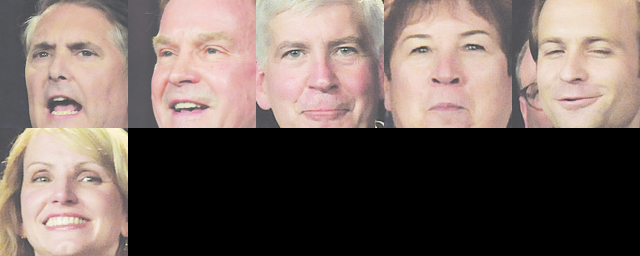

Results found in file a-3.png


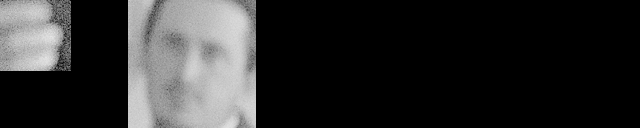

In [115]:
for index in detected_papers:
    crop_faces_and_display(detected_papers[index],index)

# More Generalized
 From start to here, I execute all commands one by one since I need to debug lots of things. Now I can make all process in one command.

In [104]:
def search_n_display(keyword,np_images):
    detected_papers = detectPapers(keyword,np_images)
    gray_images = convertGray(np_images)
    binarized_images = []
    for image in gray_images:
        binarized_images.append(binarize(image))
    
    findFaces(detected_papers)
    for index in detected_papers:
        crop_faces_and_display(detected_papers[index],index)

In [103]:
filename = "readonly/images.zip"
np_images = unpack(filename)

Results found in file a-0.png


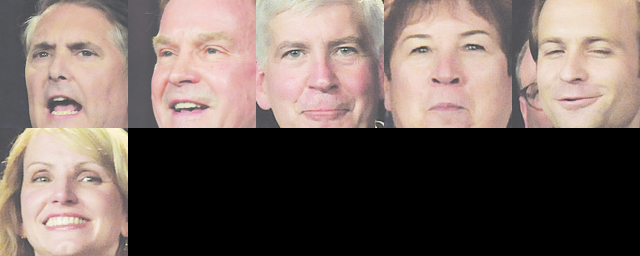

Results found in file a-1.png


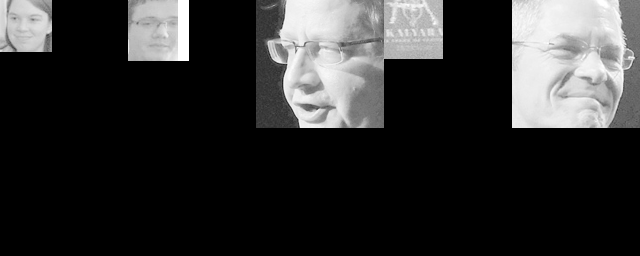

Results found in file a-2.png


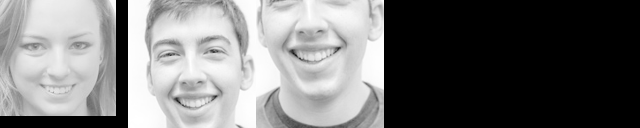

Results found in file a-3.png


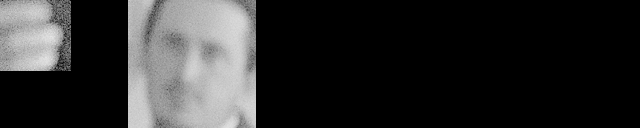

In [118]:
keyword = "Mark"
search_n_display(keyword,np_images)